In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis

First training session onf 500 epochs:
- Loss fluctuated a lot and showed no trends of improvement or worsening 

Two things I need to check:
- Model is actually learning with optimization step
- Loss is being computed correctly 
- Make sure I am not accidentally initializing new values with each epoch by calling other functions
- Make sure reward decomposition is working and values converge

Note: 
- last reward is always 0 because that's when the car crashes


## Update
- Fixed up the NN such that is it cleaner and resemble's Alex's more
- The running loss (cumulative loss) shows some patterns. It starts positive, decreases, and then negatively decreases. Makes sense because our optimizer is doing gradient descent, but I'm not sure if negative loss is a good thing. 

After 500 epochs, learner appeared to have overfitted. Agent moves indicate no evidence of actually learning - they look random. 

I think the reason why the steps are not increasing is because each new vista instantiation randomly opens a new world.

maybe rewards are diminishing too quickly to give the agent any meaningful signals

- Side-by-side still shots of my code and Alex's are *almost* identical with some pixels being off by one

**April 8th, 2023**

- I turns out the code does indeed work. The issue is that the Neural Network was performing poorly because it has a shallow architecture and no internal memory. Notice that Alex's implementation has the rewards converging to a small value; this could because his neural network (which was intended to be a skeleton network) is stuck in a suboptimal policy

In [67]:
df = pd.read_csv("results/results_2023-04-09_16-52-00.txt", sep='\t')
df = df.reset_index()
df['reward_avg'] = df['reward'].rolling(window=10).mean()
df

,index,reward,loss,reward_avg
0,0,21.0,0.005991,NaN
1,1,33.0,0.016692,NaN
2,2,52.0,0.004911,NaN
3,3,22.0,0.007555,NaN
4,4,29.0,-0.007571,NaN
...,...,...,...,...
995,995,18.0,-0.030884,20.5
996,996,20.0,0.002631,18.0
997,997,28.0,-0.001149,18.4
998,998,11.0,0.027532,16.9


<AxesSubplot:xlabel='index', ylabel='loss'>

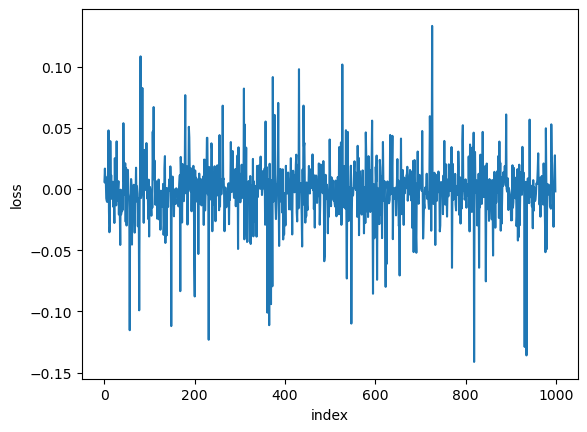

In [68]:
sns.lineplot(data=df, x='index', y='loss')

<AxesSubplot:xlabel='index', ylabel='reward'>

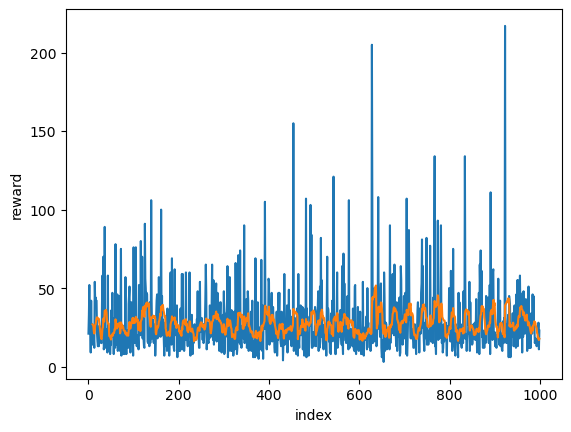

In [69]:
sns.lineplot(data=df, x='index', y='reward')
sns.lineplot(data=df, x='index', y='reward_avg')